In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np

def histogram_equalization(image):
    """
    对输入图像进行直方图均匀化处理。
    
    参数:
    image: 灰度图像对象
    
    返回:
    orig_image: 原始图像
    equalized_image: 经过直方图均匀化处理的图像
    """
    # 复制图像以保留原图
    orig_image = image.copy()
    
    # 应用直方图均匀化
    equalized_image = cv2.equalizeHist(orig_image)
    
    return orig_image, equalized_image

def clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    对输入图像进行CLAHE处理。
    
    参数:
    image: 灰度图像对象
    clip_limit: 对比度限制
    tile_grid_size: 栅格大小
    
    返回:
    orig_image: 原始图像
    clahe_image: 经过CLAHE处理的图像
    """
    # 复制图像以保留原图
    orig_image = image.copy()
    
    # 创建CLAHE对象
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # 应用CLAHE
    clahe_image = clahe.apply(orig_image)
    
    return orig_image, clahe_image

def gamma_correction(image, gamma):
    """
    对输入图像进行Gamma矫正。
    
    参数:
    image: 灰度图像对象
    gamma: Gamma值
    
    返回:
    orig_image: 原始图像
    gamma_corrected_image: 经过Gamma矫正的图像
    """
    # 复制图像以保留原图
    orig_image = image.copy()

    # 执行Gamma矫正
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    gamma_corrected_image = cv2.LUT(orig_image, table)
    
    return orig_image, gamma_corrected_image

In [3]:
def compare_images(images, titles, figsize=(15, 5)):
    """
    展示和对比多幅图像。
    
    参数:
    images: 包含多幅图像的列表
    titles: 对应每幅图像的标题列表
    figsize: 图像显示的尺寸
    """
    assert len(images) == len(titles), "图像数量和标题数量需要匹配。"
    
    # 创建一个新的figure
    plt.figure(figsize=figsize)
    
    # 遍历所有图像和标题，进行展示
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    
    # 显示图像
    plt.show()

In [7]:
# 加载示例图像
image1 = cv2.imread("images/1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("images/2.jpg", cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread("images/3.jpg", cv2.IMREAD_GRAYSCALE)

images = [image1, image2, image3]

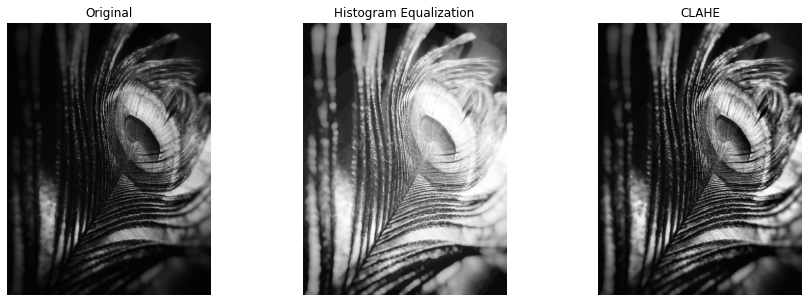

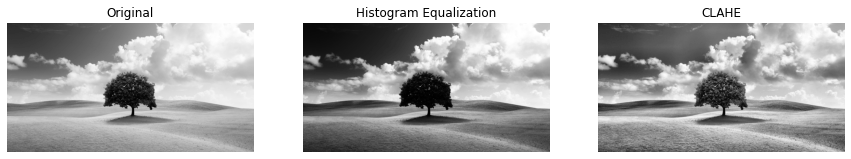

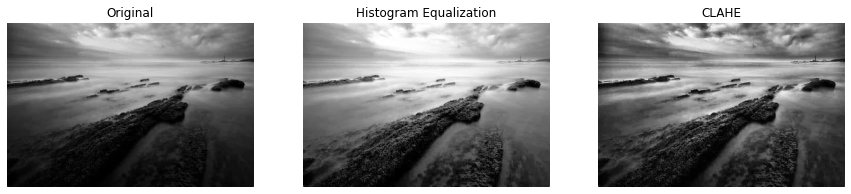

In [8]:
for image in images:
    # 直方图均匀化
    orig_image, equalized_image = histogram_equalization(image)

    # CLAHE
    orig_image, clahe_image = clahe(image)

    # 比较图像
    results = [orig_image, equalized_image, clahe_image]
    titles = ["Original", "Histogram Equalization", "CLAHE"]
    compare_images(results, titles)

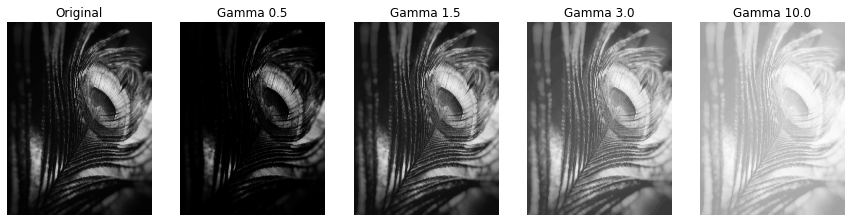

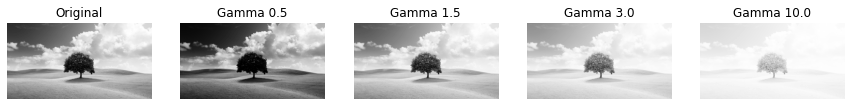

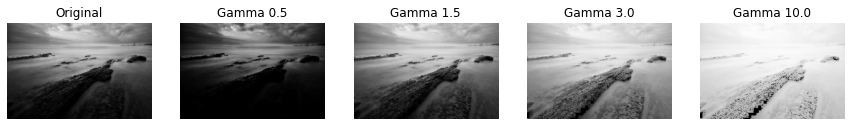

In [9]:
for image in images:
    # 定义不同的Gamma值
    gamma_values = [0.5, 1.5, 3.0, 10.0]

    # 应用Gamma矫正并存储结果
    gamma_corrected_images = [gamma_correction(image, gamma)[1] for gamma in gamma_values]

    # 准备图像和标题列表以供比较
    results = [image] + gamma_corrected_images
    titles = ['Original'] + [f'Gamma {gamma}' for gamma in gamma_values]

    # 使用compare_images函数展示比较结果
    compare_images(results, titles)